In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
import numpy as np
TrainingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEC.npy')
TrainingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEC.npy')
testingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEC.npy')
testingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEC.npy')

TrainingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEO.npy')
TrainingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEO.npy')
testingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEO.npy')
testingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEO.npy')

In [4]:
print(TrainingEC.shape)
print(TrainingEClabel.shape)
print(testingEC.shape)
print(testingEClabel.shape)

(1512, 500, 19)
(1512, 2)
(378, 500, 19)
(378, 2)


In [6]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Activation, Dropout, GRU
import pandas as pd
from keras.optimizers import SGD
import math
from keras.layers import Conv1D,MaxPool1D,LSTM, Dropout

from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense

# Control Dataset
import os
import scipy
from scipy import io, signal
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pywt
#from __future__ import print_function
from matplotlib import pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [7]:
temporal_dimension = TrainingEC.shape[1]
num_channels = TrainingEC.shape[2]
num_classes = 2
modellstm = Sequential()
modellstm.add(Conv1D(64, 5, activation='elu', input_shape=(temporal_dimension,num_channels)))
modellstm.add(MaxPool1D(3,1,))
modellstm.add(Dropout(0.2))
    # model.add(BatchNormalization())
modellstm.add(Conv1D(48, 5, activation='elu'))
modellstm.add(MaxPool1D(3,1,))
modellstm.add(Dropout(0.2))
    # model.add(BatchNormalization())
modellstm.add(Conv1D(24, 3, activation='elu'))
modellstm.add(MaxPool1D(3,1,))
modellstm.add(Dropout(0.2))
    # model.add(BatchNormalization())
modellstm.add(LSTM(128, return_sequences=True))
modellstm.add(LSTM(64)) #stacked recurrent layers said to enable deeper time series learningmodel.add(Dense(bdfData.info['nchan']))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
modellstm.add(Dense(units=2))
modellstm.add(Activation('sigmoid'))
modellstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 496, 64)           6144      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 494, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 494, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 490, 48)           15408     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 488, 48)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 488, 48)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 486, 24)           3

In [8]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmmulti.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

modellstm.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 100
EPOCHS = 50

history = modellstm.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
13/13 [==============================] - 3s 258ms/step - loss: 0.6456 - acc: 0.6476 - val_loss: 0.5799 - val_acc: 0.7261
Epoch 2/50
13/13 [==============================] - 2s 184ms/step - loss: 0.5392 - acc: 0.7494 - val_loss: 0.5434 - val_acc: 0.7426
Epoch 3/50
13/13 [==============================] - 2s 184ms/step - loss: 0.5111 - acc: 0.7601 - val_loss: 0.4914 - val_acc: 0.7723
Epoch 4/50
13/13 [==============================] - 2s 178ms/step - loss: 0.5388 - acc: 0.7320 - val_loss: 0.4966 - val_acc: 0.7855


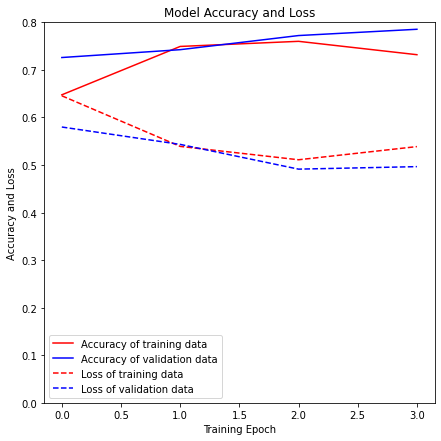

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [10]:
#%accuracy on test data
#y_testEC = np_utils.to_categorical(y_testEC,2)

score = modellstm.evaluate(testingEC, testingEClabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

12/12 [==============================] - 1s 67ms/step - loss: 0.5094 - acc: 0.7540

Accuracy on test data: 0.75

Loss on test data: 0.51


In [12]:
LABELS = ['Control','MDD']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

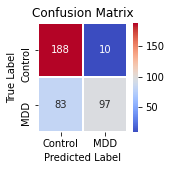

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       198
           1       0.91      0.54      0.68       180

    accuracy                           0.75       378
   macro avg       0.80      0.74      0.74       378
weighted avg       0.80      0.75      0.74       378



In [13]:
y_pred_test = modellstm.predict(testingEC)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEClabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [15]:
# 1DCNN+GRU model
temporal_dimension = TrainingEC.shape[1]
num_channels = TrainingEC.shape[2]
num_classes = 2
modelGRU = Sequential()
modelGRU.add(Conv1D(64, 5, activation='elu', input_shape=(temporal_dimension,num_channels)))
modelGRU.add(MaxPool1D(3,1,))
modelGRU.add(Dropout(0.2))
    # model.add(BatchNormalization())
modelGRU.add(Conv1D(48, 5, activation='elu'))
modelGRU.add(MaxPool1D(3,1,))
modelGRU.add(Dropout(0.2))
    # model.add(BatchNormalization())
modelGRU.add(Conv1D(24, 3, activation='elu'))
modelGRU.add(MaxPool1D(3,1,))
modelGRU.add(Dropout(0.2))
    # model.add(BatchNormalization())
modelGRU.add(GRU(128, return_sequences=True))
modelGRU.add(GRU(64)) #stacked recurrent layers said to enable deeper time series learningmodel.add(Dense(bdfData.info['nchan']))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
modelGRU.add(Dense(units=2))
modelGRU.add(Activation('sigmoid'))
modelGRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 496, 64)           6144      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 494, 64)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 494, 64)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 490, 48)           15408     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 488, 48)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 488, 48)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 486, 24)          

In [17]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmmulti.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

modelGRU.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 100
EPOCHS = 50

history = modelGRU.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
13/13 [==============================] - 3s 233ms/step - loss: 0.6673 - acc: 0.5997 - val_loss: 0.6623 - val_acc: 0.6502
Epoch 2/50
13/13 [==============================] - 2s 171ms/step - loss: 0.6006 - acc: 0.6849 - val_loss: 0.6262 - val_acc: 0.6997
Epoch 3/50
13/13 [==============================] - 2s 170ms/step - loss: 0.5592 - acc: 0.7089 - val_loss: 0.5838 - val_acc: 0.7129
Epoch 4/50
13/13 [==============================] - 2s 172ms/step - loss: 0.5292 - acc: 0.7419 - val_loss: 0.5533 - val_acc: 0.7360
Epoch 5/50
13/13 [==============================] - 2s 172ms/step - loss: 0.5092 - acc: 0.7560 - val_loss: 0.5332 - val_acc: 0.7525
Epoch 6/50
13/13 [==============================] - 2s 171ms/step - loss: 0.4676 - acc: 0.7858 - val_loss: 0.5169 - val_acc: 0.7492
Epoch 7/50
13/13 [==============================] - 2s 170ms/step - loss: 0.4550 - acc: 0.7916 - val_loss: 0.5102 - val_acc: 0.7393
Epoch 8/50
13/13 [==============================] - 2s 164ms/step - loss: 0.

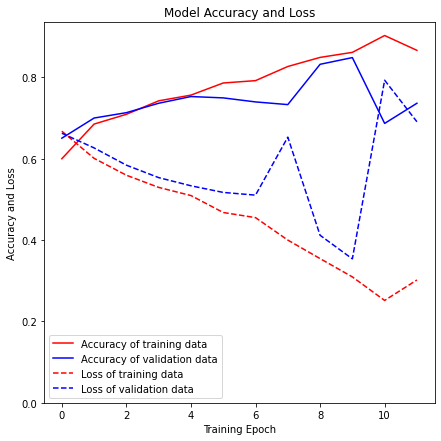

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [19]:
#%accuracy on test data
#y_testEC = np_utils.to_categorical(y_testEC,2)

score = modelGRU.evaluate(testingEC, testingEClabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

12/12 [==============================] - 1s 63ms/step - loss: 0.7842 - acc: 0.7143

Accuracy on test data: 0.71

Loss on test data: 0.78


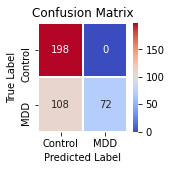

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       198
           1       1.00      0.40      0.57       180

    accuracy                           0.71       378
   macro avg       0.82      0.70      0.68       378
weighted avg       0.82      0.71      0.68       378



In [20]:
y_pred_test = modelGRU.predict(testingEC)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEClabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))